# 8. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

# LinearSVC

In [249]:
import pandas as pd

cancer_filepath = "datasets/cancer/data.csv"
cancer = pd.read_csv(cancer_filepath)

cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [250]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [251]:
cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [252]:
from sklearn.model_selection import train_test_split
# Split into training and test set. Stratify column 'diagnosis'

cancer_train, cancer_test = train_test_split(cancer, test_size=0.3, stratify=cancer['diagnosis'], random_state=42)

# Sizes
print(cancer_train.shape)
print(cancer_test.shape)

(398, 33)
(171, 33)


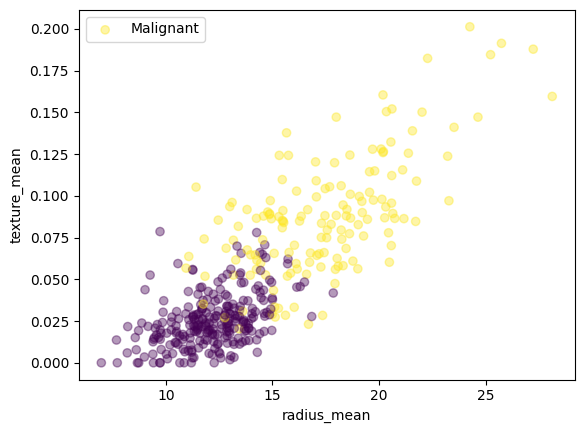

In [253]:
from matplotlib import pyplot as plt

# Convert y to 0 and 1
y_binary = cancer_train['diagnosis'].map({'M': 1, 'B': 0})

# Plot the data
plt.scatter(cancer_train['radius_mean'], cancer_train['concave points_mean'], c=y_binary, alpha=0.4)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.legend(['Malignant', 'Benign'])
plt.show()

In [254]:
# Preprocessors

num_features = ['radius_mean', 'concave points_mean']
cat_features = ['diagnosis']

print(cancer_train[num_features].head())
print(cancer_train[cat_features].head())

     radius_mean  concave points_mean
78         20.18              0.16040
330        16.03              0.07041
378        13.66              0.02471
213        17.42              0.06597
89         14.64              0.07064
    diagnosis
78          M
330         M
378         B
213         M
89          B


In [255]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
   ("num", StandardScaler(), num_features),
   ("cat", OrdinalEncoder(), cat_features)
], remainder="drop")

In [256]:
cancer_train_trans = preprocessor.fit_transform(cancer_train)

In [257]:
print(cancer_train[num_features + cat_features].head())
print(cancer_train_trans[0:5, :])

     radius_mean  concave points_mean diagnosis
78         20.18              0.16040         M
330        16.03              0.07041         M
378        13.66              0.02471         B
213        17.42              0.06597         M
89         14.64              0.07064         B
[[ 1.70581999  2.84839268  1.        ]
 [ 0.53638811  0.55700173  1.        ]
 [-0.13145612 -0.60664497  0.        ]
 [ 0.92807734  0.44394722  1.        ]
 [ 0.14469888  0.56285816  0.        ]]


In [258]:
X = cancer_train_trans[:, :2]
y = cancer_train_trans[:, 2]

print(X.shape)
print(y.shape)

(398, 2)
(398,)


In [275]:
from sklearn.svm import LinearSVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from time import time

Cs = [0.1, 1, 10, 100, 1e3, 1e4, 1e5, 1e6, 1e7]
dual = ["auto"]
max_iter = [1000000]
multi_class = ["ovr", "crammer_singer"]
param_grid = {
    "C": Cs,
    "dual":dual,
    "max_iter": max_iter,
    "multi_class": multi_class,
    "class_weight": ["balanced", None]
    }

clf = LinearSVC()

tic = time()
gsh = HalvingGridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    factor=2,
    cv=5
)

gsh.fit(X, y)
gsh_time = time() - tic

print(f"HSV time {gsh_time}")

HSV time 1.253566026687622


In [276]:
# See results
best_model = gsh.best_estimator_
print(best_model)

LinearSVC(C=0.1, class_weight='balanced', dual='auto', max_iter=1000000,
          multi_class='crammer_singer')


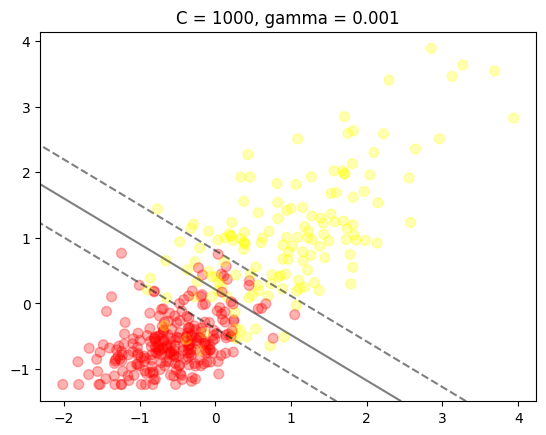

In [317]:
import numpy as np

def plot_svc(X, y, best_model):
    params = best_model.get_params()
    C = params['C']
    try:
        gamma = params['gamma']
    except KeyError:
        gamma = None

    # Scatter of the data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', alpha=0.3)
    plt.title('C = ' + str(C) + ', gamma = ' + str(gamma))

    # Decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = best_model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])              


    plt.show()

plot_svc(X, y, best_model)

In [318]:
# Measure model performance

cancer_test_trans = preprocessor.fit_transform(cancer_test)
X_test_trans = cancer_test_trans[:, :2]
y_test_trans = cancer_test_trans[:, 2]

print(X_test_trans.shape)
print(y_test_trans.shape)

(171, 2)
(171,)


In [319]:
y_pred = best_model.predict(X_test_trans)

In [320]:
# Precision, recall, and F1 score weighted
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_trans, y_pred, average='weighted')

print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1_score))

# AUC ROC
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test_trans, y_pred)
print('AUC ROC: %.3f' % score)



Precision: 0.907
Recall: 0.906
F1 score: 0.905


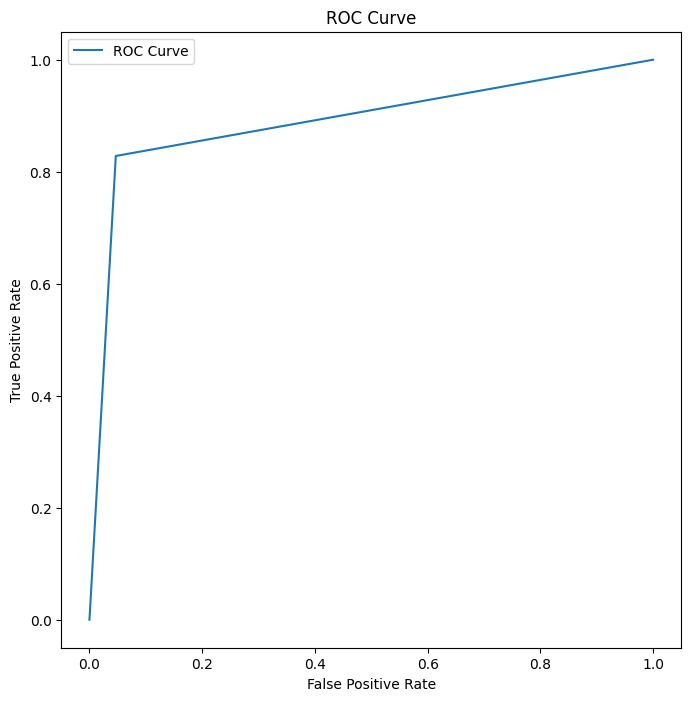

In [322]:
# Plot the curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_trans, y_pred)
ax, fig = plt.subplots(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# SVC

In [356]:
from sklearn.svm import SVC

param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.1,1, 10, 100],
    'gamma': ["auto", "scale", 1,0.1,0.01,0.001],
    'degree': [1, 2, 3, 4, 5],
    'shrinking': [True, False],
    'class_weight': ["balanced", None]
}

clf = SVC()

tic = time()
gsh = HalvingGridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    factor=2,
    cv=3
)

gsh.fit(X, y)
gsh_time = time() - tic

print(f"HSV time {gsh_time}")

HSV time 15.10390043258667


In [357]:
# Best Model
best_model = gsh.best_estimator_
best_model

SVC(C=10, class_weight='balanced', degree=1, gamma=0.1)

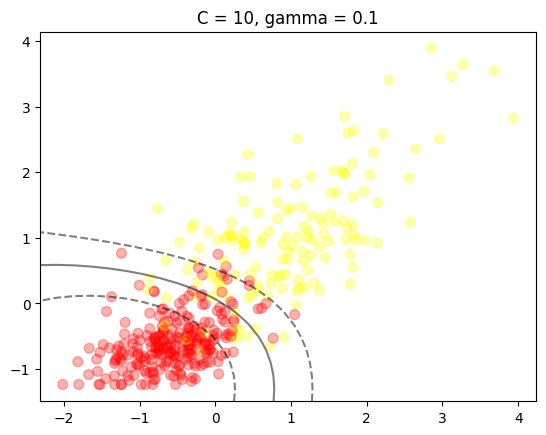

In [358]:
plot_svc(X, y, best_model)

In [359]:
# Measure model performance

y_pred = best_model.predict(X_test_trans)

In [360]:
# Precision, recall, and F1 score weighted
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_trans, y_pred, average='weighted')

print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1_score))

# AUC ROC
score = roc_auc_score(y_test_trans, y_pred)
print('AUC ROC: %.3f' % score)

Precision: 0.918
Recall: 0.918
F1 score: 0.918
AUC ROC: 0.913


# SGD Classifier

In [375]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "loss": ["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron", "squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
    "alpha": [0.1, 0.01, 0.001, 0.0001, 0.00001],
    "learning_rate": ["optimal", "invscaling", "adaptive"],
    "eta0": [0.1],
    "class_weight": ["balanced", None]
}

tic = time()
gs = GridSearchCV(SGDClassifier(), param_grid, cv=3, n_jobs=-1, verbose=1)

clf = SGDClassifier()

gs.fit(X, y)
gs_time = time() - tic

print(f"HSV time {gsh_time}")

Fitting 3 folds for each of 270 candidates, totalling 810 fits
HSV time 2.709883451461792


In [379]:
# Best Model
best_model = gsh.best_estimator_
params = best_model.get_params()
print(params)

{'alpha': 0.01, 'average': False, 'class_weight': 'balanced', 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.1, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


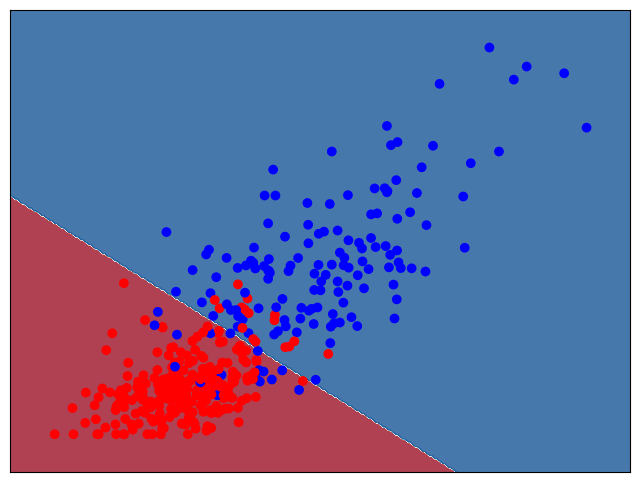

In [377]:
# Plot SGD Classifier results

def plotSGDclf(X, y, best_model):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Create color maps
    from matplotlib.colors import ListedColormap
    import numpy as np
    import matplotlib.pyplot as plt

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    h = .02  # step size in the mesh

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

plotSGDclf(X, y, best_model)

In [380]:
y_pred = best_model.predict(X_test_trans)

In [382]:
# Precision, recall, and F1 score weighted
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_trans, y_pred, average='weighted')

print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1_score))

# AUC ROC
score = roc_auc_score(y_test_trans, y_pred)
print('AUC ROC: %.3f' % score)

Precision: 0.924
Recall: 0.924
F1 score: 0.924
AUC ROC: 0.917
